### **10K Analysis** - Intro

### Steps:
1. **Define a company (ticker)**.
2. **Get the Balance Sheet, Income Statement and Cash Flow Data** [check the data].
3. **Extract the relevant data and calculate ratios**.
4. **Store the data in a dictionary or a DataFrame**.
5. **Combine results into one final DataFrame**.
6. **Visualize**.


### Next Steps:

- **Further customize the analysis** depending on the specific financial metrics and comparisons you want to perform calculate different ratios or display different data points.


In [56]:
import yfinance as yf
import pandas as pd
# Set pandas options
pd.set_option('future.no_silent_downcasting', True)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [59]:
ticker = yf.Ticker("AMZN")
ticker_info = ticker.history(period='5y')
# Balance sheet, cash_flow and income_statement
balance_sheet = ticker.balance_sheet
cash_flow = ticker.cashflow
income_statement = ticker.financials

In [60]:
#Inspect the data frame
balance_sheet

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Treasury Shares Number,515000000.0,515000000.0,460000000.0,480000000.0,NaN
Ordinary Shares Number,10383000000.0,10242000000.0,10180000000.0,10060000000.0,NaN
Share Issued,10898000000.0,10757000000.0,10640000000.0,10540000000.0,NaN
Net Debt,NaN,13262000000.0,12524000000.0,NaN,NaN
Total Debt,135611000000.0,140118000000.0,116395000000.0,84389000000.0,NaN
Tangible Book Value,171399000000.0,119658000000.0,117767000000.0,73406000000.0,NaN
Invested Capital,260189000000.0,213193000000.0,186989000000.0,125220000000.0,NaN
Working Capital,7434000000.0,-8602000000.0,19314000000.0,6348000000.0,NaN
Net Tangible Assets,171399000000.0,119658000000.0,117767000000.0,73406000000.0,NaN
Capital Lease Obligations,77297000000.0,72968000000.0,67651000000.0,52573000000.0,NaN


In [61]:
#Inspect the data frame
cash_flow

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Free Cash Flow,32217000000.0,-16893000000.0,-14726000000.0,25924000000.0
Repurchase Of Capital Stock,0.0,-6000000000.0,0.0,0.0
Repayment Of Debt,-33737000000.0,-46753000000.0,-20506000000.0,-18425000000.0
Issuance Of Debt,18129000000.0,62719000000.0,26959000000.0,17321000000.0
Capital Expenditure,-52729000000.0,-63645000000.0,-61053000000.0,-40140000000.0
Interest Paid Supplemental Data,3112000000.0,2142000000.0,1772000000.0,1630000000.0
Income Tax Paid Supplemental Data,11179000000.0,6035000000.0,3688000000.0,1713000000.0
End Cash Position,73890000000.0,54253000000.0,36477000000.0,42377000000.0
Beginning Cash Position,54253000000.0,36477000000.0,42377000000.0,36410000000.0
Effect Of Exchange Rate Changes,403000000.0,-1093000000.0,-364000000.0,618000000.0


In [62]:
#Inspect the data frame
income_statement

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Tax Effect Of Unusual Items,211380035.679101,-3415860000.0,1839997169.143666,287626230.457441,NaN
Tax Rate For Calcs,0.189579,0.21,0.12558,0.118413,NaN
Normalized EBITDA,88287000000.0,54618000000.0,59741000000.0,48647000000.0,NaN
Total Unusual Items,1115000000.0,-16266000000.0,14652000000.0,2429000000.0,NaN
Total Unusual Items Excluding Goodwill,1115000000.0,-16266000000.0,14652000000.0,2429000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,30425000000.0,-2722000000.0,33364000000.0,21331000000.0,NaN
Reconciled Depreciation,48663000000.0,41921000000.0,34433000000.0,25251000000.0,NaN
Reconciled Cost Of Revenue,480980000000.0,446343000000.0,403507000000.0,334564000000.0,NaN
EBITDA,89402000000.0,38352000000.0,74393000000.0,51076000000.0,NaN
EBIT,40739000000.0,-3569000000.0,39960000000.0,25825000000.0,NaN


In [63]:
# Extract balance sheet items
total_assets = balance_sheet.loc['Total Assets']
total_liabilities = balance_sheet.loc['Total Liabilities Net Minority Interest']
stockholders_equity = balance_sheet.loc['Ordinary Shares Number']
current_assets = balance_sheet.loc['Current Assets']
current_liabilities = balance_sheet.loc['Current Liabilities']
cash_and_equivalents = balance_sheet.loc['Cash And Cash Equivalents']
long_term_debt = balance_sheet.loc['Long Term Debt']
retained_earnings = balance_sheet.loc['Retained Earnings']
share_outstanding = ticker_info['Volume'].mean()

# Extract income statement items 
net_income = income_statement.loc['Net Income']
total_revenue = income_statement.loc['Total Revenue']
operating_revenue = income_statement.loc['Operating Revenue']
cost_of_revenue = income_statement.loc['Cost Of Revenue']
gross_profit = income_statement.loc['Gross Profit']
total_equity = stockholders_equity 

#Extract cash flow statement items
fcf = cash_flow.loc['Free Cash Flow']
end_cash_position = cash_flow.loc['End Cash Position']


# Calculate financial ratios
debt_to_equity = total_liabilities / stockholders_equity
current_ratio = current_assets / current_liabilities
quick_ratio = (current_assets - balance_sheet.loc['Inventory']) / current_liabilities
eps = net_income / share_outstanding
gross_margin = gross_profit / total_revenue

# Calculate ROA and ROE
roa = net_income / total_assets
roe = net_income / total_equity

# Growth
revenue_growth = round((income_statement.loc['Total Revenue'].pct_change()*100).dropna(),2)
cor_growth = round((income_statement.loc['Cost Of Revenue'].pct_change()*100).dropna(),2)

financial_data = pd.DataFrame({
    
    'Total Revenue': total_revenue,
    'Operating Revenue': operating_revenue,
    'Cost Of Revenue': cost_of_revenue,
    'Total Assets': total_assets,
    'Total Liabilities': total_liabilities,
    'Current Assets': current_assets,
    'Current Liabilities': current_liabilities,
    'Retained Earnings': retained_earnings,
    'Long Term Debt': long_term_debt,
    'Free Cash Flow': fcf,
    'End Cash Position': end_cash_position
})

shareholder_data = pd.DataFrame({

    'Cash and Cash Equivalents': cash_and_equivalents,
    'Net Income': net_income,
    'Stockholders Equity': stockholders_equity
})

financial_ratios = pd.DataFrame({
    'Current Ratio': current_ratio,
    'Quick Ratio': quick_ratio,
    'Debt to Equity Ratio': debt_to_equity,
    'EPS': eps,
    'Gross Margin': gross_margin,
    'ROA': roa,
    'ROE': roe
})

growth_data = pd.DataFrame({
    'Revenue Growth (%)': revenue_growth,
    'Cost of Revenue Growth (%)': cor_growth
})

financial_data = financial_data.apply(pd.to_numeric, errors='coerce')
financial_data = financial_data.dropna(how='all')
financial_data.index = financial_data.index.year

shareholder_data = shareholder_data.apply(pd.to_numeric, errors='coerce')
shareholder_data = shareholder_data.dropna(how='all')
shareholder_data.index = shareholder_data.index.year

growth_data.index = growth_data.index.year

/var/folders/12/z9gqfsj56nz7dh7sffjpgjqr0000gn/T/ipykernel_13037/3059033973.py:37: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  revenue_growth = round((income_statement.loc['Total Revenue'].pct_change()*100).dropna(),2)
/var/folders/12/z9gqfsj56nz7dh7sffjpgjqr0000gn/T/ipykernel_13037/3059033973.py:38: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  cor_growth = round((income_statement.loc['Cost Of Revenue'].pct_change()*100).dropna(),2)


In [51]:
financial_ratios.dropna(how='all')

,Current Ratio,Quick Ratio,Debt to Equity Ratio,EPS,Gross Margin,ROA,ROE
2021-01-31,0.972173,0.486999,19.492497,604.613118,0.248298,0.053506,1.596361
2022-01-31,0.927797,0.281063,18.467826,611.907858,0.250987,0.05584,1.65073
2023-01-31,0.820571,0.206935,19.655062,522.715116,0.241405,0.048027,1.441975
2024-01-31,0.831867,0.237894,20.092873,694.163884,0.243754,0.061454,1.925875


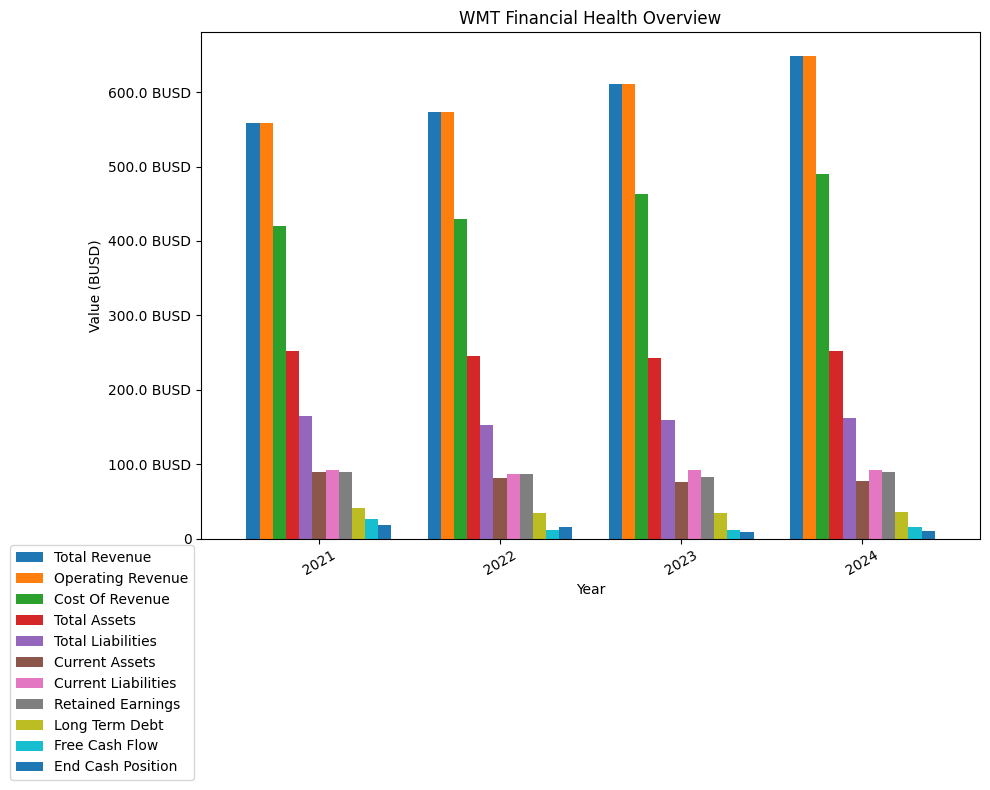

In [52]:
# Plotting the financial data
financial_data.plot(kind='bar',figsize=(10, 8), width=0.8)

# Set title and labels
plt.title(f"{ticker.ticker} Financial Health Overview")
plt.xlabel("Year")
plt.ylabel("Value (BUSD)")

# Format the y-axis to display in billions for relevant items
def billions(x, pos):
    return f'{x * 1e-9:.1f} BUSD' if x > 1e6 else f'{x:.0f}'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(billions))

# Rotate x-axis labels for better readability
plt.xticks(rotation=30)
plt.legend(loc='upper right', bbox_to_anchor=(0, 0))
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

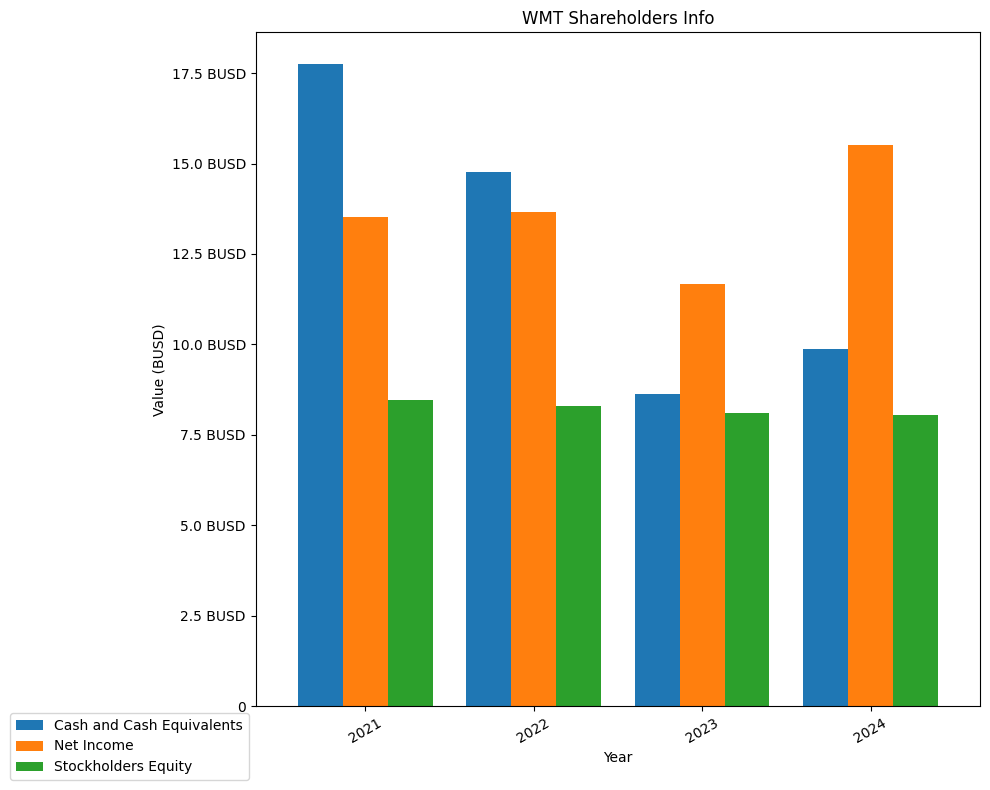

In [53]:
# Plotting the shareholders data
shareholder_data.plot(kind='bar',figsize=(10, 8), width=0.8)

# Set title and labels
plt.title(f"{ticker.ticker} Shareholders Info")
plt.xlabel("Year")
plt.ylabel("Value (BUSD)")

# Format the y-axis to display in billions
def billions(x, pos):
    return f'{x * 1e-9:.1f} BUSD' if x > 1e6 else f'{x:.0f}'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(billions))
plt.xticks(rotation=30)
plt.legend(loc='upper right', bbox_to_anchor=(0, 0))
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

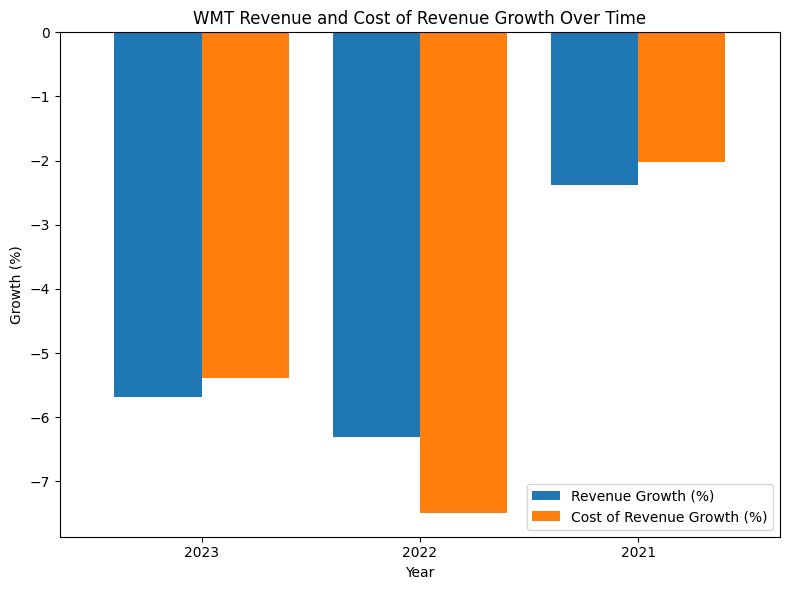

In [54]:
# Plot the growth DataFrame
growth_data.plot(kind='bar', figsize=(8, 6), width=0.8)

# Set title and labels
plt.title(f"{ticker.ticker} Revenue and Cost of Revenue Growth Over Time")
plt.xlabel("Year")
plt.ylabel("Growth (%)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Place legend at the bottom right
plt.legend(loc='lower right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## BALANCE SHEET

1.	Treasury Shares Number: The number of shares repurchased by the company and held in its treasury. Important for understanding the number of shares outstanding and potential dilution.
2.	Ordinary Shares Number: The number of shares issued and outstanding. Crucial for calculating earnings per share (EPS) and understanding ownership distribution.
3.	Share Issued: Total shares issued by the company. Important for assessing the company’s capital structure and potential dilution effects.
4.	Net Debt: Total debt minus cash and cash equivalents. Indicates the company’s financial leverage and risk.
5.	Total Debt: The sum of short-term and long-term debt. Helps gauge the company’s overall debt level and financial risk.
6.	Tangible Book Value: Total assets minus intangible assets and liabilities. Reflects the net worth of the company excluding intangible assets.
7.	Invested Capital: Total capital invested in the company (equity + debt). Essential for evaluating return on invested capital (ROIC).
8.	Working Capital: Current assets minus current liabilities. Indicates the company’s short-term liquidity and operational efficiency.
9.	Net Tangible Assets: Total assets minus intangible assets and total liabilities. Reflects the value of the company’s physical assets.
10.	Common Stock Equity: Equity value attributable to common shareholders. Important for calculating the company’s book value per share.
11.	Total Capitalization: Total debt plus total equity. Reflects the company’s capital structure and financial stability.
12.	Total Equity Gross Minority Interest: Total equity including the share of equity attributable to minority interests. Important for assessing the total value of the company’s equity.
13.	Minority Interest: Equity in a subsidiary not owned by the parent company. Essential for consolidated financial statements.
14.	Stockholders Equity: Total value of the company’s equity. Indicates the residual value to shareholders after liabilities.
15.	Gains Losses Not Affecting Retained Earnings: Non-operating gains or losses not affecting retained earnings. Important for understanding comprehensive income.
16.	Other Equity Adjustments: Miscellaneous adjustments to equity, such as revaluation reserves. Important for accurate equity valuation.
17.	Treasury Stock: Shares repurchased and held by the company. Affects the number of outstanding shares and can impact earnings per share.
18.	Retained Earnings: Cumulative net income not distributed as dividends. Reflects the company’s ability to reinvest in growth.
19.	Additional Paid In Capital: Capital received from shareholders above the par value of shares. Important for understanding the capital raised in excess of the nominal value.
20.	Capital Stock: The total value of the company’s outstanding shares. Used to assess the company’s capital structure.
21.	Common Stock: Shares representing ownership in the company. Important for shareholder rights and earnings distribution.
22.	Total Liabilities Net Minority Interest: Total liabilities minus minority interests. Important for assessing the company’s total obligations.
23.	Total Non Current Liabilities Net Minority Interest: Long-term liabilities minus minority interests. Reflects long-term financial obligations.
24.	Other Non Current Liabilities: Miscellaneous long-term liabilities not classified elsewhere. Important for assessing total long-term debt.
25.	Employee Benefits: Future obligations related to employee benefits. Impacts long-term financial planning and liabilities.
26.	Trade and Other Payables Non Current: Long-term payables. Important for understanding the company’s future financial commitments.
27.	Non Current Deferred Liabilities: Long-term liabilities deferred to future periods. Reflects future financial obligations.
28.	Non Current Deferred Taxes Liabilities: Taxes payable in future periods. Important for understanding deferred tax obligations.
29.	Long Term Debt And Capital Lease Obligation: Long-term borrowings and lease obligations. Key for assessing long-term financial leverage.
30.	Long Term Debt: Debt obligations due beyond one year. Indicates long-term financial risk.
31.	Current Liabilities: Obligations due within one year. Reflects short-term financial obligations.
32.	Current Debt And Capital Lease Obligation: Short-term borrowings and lease obligations. Important for short-term liquidity analysis.
33.	Current Debt: Debt due within one year. Impacts short-term liquidity and financial health.
34.	Other Current Borrowings: Miscellaneous short-term borrowings. Important for understanding short-term financial obligations.
35.	Line Of Credit: Short-term credit available to the company. Affects liquidity and flexibility.
36.	Commercial Paper: Short-term, unsecured promissory notes issued by the company. Indicates short-term funding sources.
37.	Pension and Other Post Retirement Benefit Plans Current: Short-term pension and retirement obligations. Impacts short-term liabilities.
38.	Payables And Accrued Expenses: Short-term liabilities for unpaid expenses. Important for assessing short-term financial health.
39.	Current Accrued Expenses: Expenses incurred but not yet paid. Reflects short-term financial obligations.
40.	Payables: Amounts owed to suppliers or creditors. Affects short-term liquidity.
41.	Dividends Payable: Dividends declared but not yet paid. Indicates upcoming cash outflows.
42.	Total Tax Payable: Total taxes due. Impacts short-term financial obligations.
43.	Income Tax Payable: Taxes owed to government. Reflects current tax obligations.
44.	Accounts Payable: Short-term liabilities for goods and services received. Key for assessing short-term liquidity.
45.	Total Assets: Total value of everything owned by the company. Indicates the company’s overall size and financial health.
46.	Total Non Current Assets: Assets not expected to be converted to cash within one year. Reflects long-term investment in the company.
47.	Other Non Current Assets: Miscellaneous long-term assets. Important for understanding total long-term assets.
48.	Non Current Deferred Assets: Long-term assets with deferred recognition. Reflects future asset value.
49.	Non Current Deferred Taxes Assets: Deferred tax assets expected to be realized in future periods. Important for future tax benefits.
50.	Investments And Advances: Investments and loans to other entities. Indicates the company’s investment strategy.
51.	Long Term Equity Investment: Investments in other companies held for the long term. Reflects strategic investment decisions.
52.	Investments in Subsidiaries at Cost: Investments in subsidiaries recorded at cost. Important for assessing ownership and control.
53.	Goodwill And Other Intangible Assets: Non-physical assets like goodwill. Reflects company value beyond tangible assets.
54.	Other Intangible Assets: Intangible assets not classified as goodwill. Important for understanding non-physical asset value.
55.	Goodwill: Premium paid over the fair value of acquired assets. Reflects value of acquired businesses.
56.	Net PPE: Net value of property, plant, and equipment after depreciation. Indicates value of physical assets.
57.	Accumulated Depreciation: Total depreciation of assets over time. Important for assessing asset value.
58.	Gross PPE: Total value of property, plant, and equipment before depreciation. Reflects investment in physical assets.
59.	Construction In Progress: Assets under construction. Important for understanding future asset value.
60.	Machinery Furniture Equipment: Physical assets used in operations. Reflects investment in operational infrastructure.
61.	Buildings And Improvements: Investment in buildings and infrastructure. Indicates long-term asset base.
62.	Land And Improvements: Value of land and related improvements. Reflects long-term investment in property.
63.	Properties: Total value of real estate owned. Important for understanding asset base and future growth.
64.	Current Assets: Assets expected to be converted to cash within one year. Reflects short-term financial health.
65.	Other Current Assets: Miscellaneous short-term assets. Important for understanding total current asset base.
66.	Inventory: Goods available for sale. Key for assessing operational efficiency and supply chain management.
67.	Finished Goods: Completed products ready for sale. Indicates production and sales capabilities.
68.	Raw Materials: Unprocessed materials used in production. Reflects supply chain and production capacity.
69.	Receivables: Amounts owed to the company by customers. Indicates expected cash inflows.
70.	Other Receivables: Miscellaneous receivables not classified elsewhere. Important for understanding total receivables.
71.	Accounts Receivable: Amounts due from customers for goods or services provided. Key for cash flow management.
72.	Allowance For Doubtful Accounts Receivable: Provision for uncollectible receivables. Reflects potential bad debt.
73.	Gross Accounts Receivable: Total receivables before allowances. Indicates total amount due from customers.
74.	Cash Cash Equivalents And Short Term Investments: Liquid assets available for immediate use. Essential for assessing liquidity.
75.	Cash And Cash Equivalents: Cash on hand and near-cash assets. Reflects immediate financial health and liquidity.

### Key Items for Company Stock Analysis

	1.	Earnings Per Share (EPS): Key profitability measure.
	2.	Net Debt: Financial leverage and risk assessment.
	3.	Working Capital: Short-term liquidity and operational efficiency.
	4.	Tangible Book Value: Net worth excluding intangibles.
	5.	Total Debt: Overall debt level.
	6.	Retained Earnings: Reinvestment capacity.
	7.	Common Stock Equity: Book value attributable to common shareholders.
	8.	Total Capitalization: Capital structure analysis.
	9.	Net PPE: Value

## CASH FLOW

1.	Free Cash Flow (FCF): Cash generated after accounting for capital expenditures. Essential for evaluating a company’s ability to generate cash for dividends, debt repayment, and reinvestment.
2.	Repurchase Of Capital Stock: The amount spent by the company to buy back its own shares. Affects share count and potentially boosts EPS and stock price.
3.	Repayment Of Debt: Cash used to pay down existing debt. Important for understanding changes in financial leverage and liquidity.
4.	Issuance Of Debt: Cash raised through new debt. Impacts the company’s financial leverage and liquidity.
5.	Capital Expenditure (CapEx): Investments in physical assets such as property, plant, and equipment. Reflects the company’s commitment to growth and long-term investments.
6.	Interest Paid Supplemental Data: Additional details on interest payments. Useful for assessing the cost of debt and its impact on cash flow.
7.	Income Tax Paid Supplemental Data: Additional details on tax payments. Important for understanding tax obligations and cash flow impact.
8.	End Cash Position: Cash and cash equivalents at the end of the period. Reflects liquidity and the company’s ability to cover short-term obligations.
9.	Beginning Cash Position: Cash and cash equivalents at the start of the period. Useful for calculating changes in cash flow over the period.
10.	Effect Of Exchange Rate Changes: Impact of currency fluctuations on cash flow. Important for companies with international operations.
11.	Changes In Cash: Net change in cash and cash equivalents during the period. Reflects overall liquidity movement.
12.	Financing Cash Flow: Cash flows related to raising and repaying capital. Important for understanding the company’s financing strategy and cash flow from financing activities.
13.	Cash Flow From Continuing Financing Activities: Cash flow from ongoing financing operations. Reflects the company’s ability to generate financing cash flow from its core operations.
14.	Net Other Financing Charges: Net costs associated with financing activities, excluding interest. Important for assessing overall financing costs.
15.	Cash Dividends Paid: Cash distributed to shareholders. Indicates how much profit is returned to shareholders versus retained in the company.
16.	Common Stock Dividend Paid: Dividends paid specifically on common stock. Reflects dividend policy and shareholder returns.
17.	Net Common Stock Issuance: Cash received from issuing new common stock minus repurchases. Affects share count and capital structure.
18.	Common Stock Payments: Payments made related to common stock activities. Includes issuance and repurchase transactions.
19.	Net Issuance Payments Of Debt: Net cash flow from issuing and repaying debt. Important for understanding changes in debt levels.
20.	Net Short Term Debt Issuance: Cash raised through issuing short-term debt minus repayments. Reflects short-term liquidity management.
21.	Short Term Debt Payments: Cash used to repay short-term debt. Impacts short-term liquidity and financial health.
22.	Short Term Debt Issuance: Cash raised through issuing short-term debt. Affects short-term financial leverage.
23.	Net Long Term Debt Issuance: Cash raised through issuing long-term debt minus repayments. Reflects long-term capital management.
24.	Long Term Debt Payments: Cash used to repay long-term debt. Important for understanding long-term financial obligations.
25.	Long Term Debt Issuance: Cash raised through issuing long-term debt. Affects long-term financial structure.
26.	Investing Cash Flow: Cash flows related to investments in assets. Reflects the company’s investment activities and capital allocation.
27.	Cash Flow From Continuing Investing Activities: Cash flow from ongoing investment operations. Indicates how investments affect overall cash flow.
28.	Net Other Investing Changes: Net changes in investing activities excluding specific investment purchases and sales. Important for overall investment strategy.
29.	Net Investment Purchase And Sale: Cash flows from buying and selling investments. Reflects investment strategy and asset allocation.
30.	Net Business Purchase And Sale: Cash flows from acquiring or selling businesses. Indicates strategic growth or divestment activities.
31.	Purchase Of Business: Cash spent to acquire another business. Reflects expansion strategy and growth potential.
32.	Capital Expenditure Reported: Reported investment in physical assets. Important for assessing future growth and asset base.
33.	Operating Cash Flow: Cash generated from core business operations. Indicates the company’s ability to generate cash from its main activities.
34.	Cash Flow From Continuing Operating Activities: Cash flow from ongoing operations. Reflects the operational efficiency and sustainability of cash flow.
35.	Change In Working Capital: Difference in working capital from one period to the next. Indicates changes in short-term liquidity and operational efficiency.
36.	Change In Other Working Capital: Changes in specific working capital components not included in the general working capital. Important for detailed liquidity analysis.
37.	Change In Payables And Accrued Expense: Difference in payables and accrued expenses from one period to the next. Reflects changes in short-term liabilities.
38.	Change In Accrued Expense: Difference in accrued expenses from one period to the next. Affects short-term financial obligations.
39.	Change In Payable: Difference in payables from one period to the next. Reflects changes in short-term obligations.
40.	Change In Account Payable: Change in amounts owed to suppliers. Impacts short-term liquidity.
41.	Change In Tax Payable: Difference in taxes owed from one period to the next. Reflects changes in tax obligations.
42.	Change In Income Tax Payable: Difference in income taxes owed from one period to the next. Indicates changes in tax liabilities.
43.	Change In Inventory: Difference in inventory levels from one period to the next. Affects working capital and operational efficiency.
44.	Change In Receivables: Difference in amounts owed by customers from one period to the next. Reflects changes in sales and cash flow.
45.	Changes In Account Receivables: Difference in accounts receivable from one period to the next. Indicates changes in cash collection.
46.	Other Non Cash Items: Adjustments for non-cash transactions. Important for accurate cash flow analysis.
47.	Asset Impairment Charge: Reduction in asset value due to impairment. Reflects potential write-downs and asset revaluation.
48.	Deferred Tax: Taxes that are accrued but not yet paid. Reflects future tax obligations or benefits.
49.	Deferred Income Tax: Taxes owed or to be received in future periods. Impacts future cash flow and tax planning.
50.	Depreciation Amortization Depletion: Non-cash expenses related to asset depreciation, amortization, and depletion. Important for understanding asset value and expense allocation.
51.	Depreciation And Amortization: Non-cash expenses that allocate the cost of assets over time. Reflects the gradual cost of asset usage.
52.	Net Income From Continuing Operations: Profit from core business activities excluding discontinued operations. Key for evaluating ongoing profitability.


### Key Items for Company Stock Analysis

	1.	Free Cash Flow (FCF): Indicates cash available for dividends, debt repayment, and reinvestment.
	2.	Capital Expenditure (CapEx): Reflects investment in growth and long-term assets.
	3.	Operating Cash Flow: Shows cash generated from core operations.
	4.	Net Income From Continuing Operations: Measures profitability from core activities.
	5.	Changes In Working Capital: Affects liquidity and operational efficiency.
	6.	Cash Flow From Continuing Operating Activities: Indicates sustainable cash flow from operations.
	7.	Repayment Of Debt: Impacts financial leverage and liquidity.
	8.	Issuance Of Debt: Affects financial leverage and liquidity.
	9.	Repurchase Of Capital Stock: Influences share count and potentially EPS.
	10.	Net Business Purchase And Sale: Reflects strategic growth or divestment activities.

## INCOME STATEMENT

1.	Tax Effect Of Unusual Items: The tax impact of unusual or non-recurring items. Helps in adjusting net income to reflect the impact of such items on taxes.
2.	Tax Rate For Calcs: The rate used for tax calculations. Important for accurate tax expense and income projections.
3.	Normalized EBITDA: Earnings Before Interest, Taxes, Depreciation, and Amortization adjusted for unusual items. Provides a clearer picture of ongoing operational performance.
4.	Total Unusual Items: The sum of all unusual or non-recurring items affecting financial statements. Helps in adjusting financial performance for unusual events.
5.	Total Unusual Items Excluding Goodwill: Unusual items excluding goodwill-related adjustments. Focuses on non-goodwill related irregularities.
6.	Net Income From Continuing Operation Net Minority Interest: Net income from ongoing operations, excluding minority interests. Reflects profitability attributable to the company’s shareholders.
7.	Reconciled Depreciation: Adjusted depreciation expense that accounts for specific accounting adjustments. Provides a more accurate view of depreciation.
8.	Reconciled Cost Of Revenue: Adjusted cost of revenue that accounts for specific accounting adjustments. Reflects more accurate costs associated with revenue generation.
9.	EBITDA (Earnings Before Interest, Taxes, Depreciation, and Amortization): Measures operating performance by excluding interest, taxes, and non-cash expenses. Useful for comparing profitability across companies and industries.
10.	EBIT (Earnings Before Interest and Taxes): Measures operating profit by excluding interest and taxes. Reflects the company’s profitability from core operations.
11.	Net Interest Income: Income earned from interest minus interest expenses. Important for understanding profitability related to interest-bearing assets and liabilities.
12.	Interest Expense: Costs incurred from borrowing. Affects net income and cash flow.
13.	Interest Income: Earnings from interest-bearing investments. Contributes to overall profitability.
14.	Normalized Income: Adjusted net income to exclude unusual or non-recurring items. Provides a clearer view of ongoing profitability.
15.	Net Income From Continuing And Discontinued Operation: Net income from both ongoing and discontinued operations. Reflects overall profitability including non-core activities.
16.	Total Expenses: Sum of all expenses incurred. Essential for understanding total cost structure and profitability.
17.	Total Operating Income As Reported: Income from operations as reported. Reflects the core profitability of the company’s operations.
18.	Diluted Average Shares: Average number of shares outstanding, including those that could be issued through stock options and convertible securities. Used to calculate diluted EPS.
19.	Basic Average Shares: Average number of shares outstanding, excluding convertible securities. Used to calculate basic EPS.
20.	Diluted EPS (Earnings Per Share): Net income per share including the effect of potentially dilutive securities. Indicates the earnings available to common shareholders after considering dilution.
21.	Basic EPS: Net income per share excluding the effect of potentially dilutive securities. Provides a straightforward measure of earnings per share.
22.	Diluted NI Avail to Com Stockholders: Net income available to common stockholders, adjusted for potential dilution. Reflects earnings available to common shareholders after considering dilution.
23.	Net Income Common Stockholders: Net income attributable to common shareholders. Represents the portion of net income available to common stockholders.
24.	Other under Preferred Stock Dividend: Adjustments related to preferred stock dividends. Affects net income available to common stockholders.
25.	Net Income: Total profit or loss after all expenses, taxes, and interest. Indicates overall profitability.
26.	Minority Interests: The portion of equity in subsidiaries not owned by the parent company. Reflects the interests of minority shareholders.
27.	Net Income Including Noncontrolling Interests: Net income including the share of profits or losses attributable to noncontrolling interests. Provides a comprehensive view of overall profitability.
28.	Net Income Continuous Operations: Net income from continuing operations. Reflects profitability from ongoing activities.
29.	Earnings From Equity Interest Net Of Tax: Earnings from equity investments after taxes. Important for understanding contributions from joint ventures and affiliates.
30.	Tax Provision: Estimated tax liability for the period. Indicates the company’s tax expense and obligation.
31.	Pretax Income: Income before taxes. Reflects operational profitability before tax effects.
32.	Other Income Expense: Income or expenses not related to primary business operations. Provides insight into non-operating financial impacts.
33.	Special Income Charges: Non-recurring income charges, such as restructuring costs. Important for adjusting financial performance for unusual events.
34.	Impairment Of Capital Assets: Reduction in the value of capital assets. Reflects write-downs and potential asset revaluation.
35.	Net Non Operating Interest Income Expense: Net income or expense from non-operating interest activities. Helps in understanding non-core financial impacts.
36.	Interest Expense Non Operating: Interest costs related to non-operating activities. Affects overall financial performance.
37.	Interest Income Non Operating: Interest income from non-operating activities. Contributes to overall financial results.
38.	Operating Income: Profit from core business operations, excluding non-operating items. Reflects the effectiveness of core business activities.
39.	Operating Expense: Costs associated with running core business operations. Important for assessing operational efficiency.
40.	Depreciation Amortization Depletion Income Statement: Non-cash expenses related to depreciation, amortization, and depletion. Reflects the gradual cost of asset usage.
41.	Depreciation And Amortization In Income Statement: Expenses related to asset depreciation and amortization reported on the income statement. Important for understanding asset cost allocation.
42.	Amortization: Allocation of the cost of intangible assets over time. Reflects the expense related to intangible asset usage.
43.	Amortization Of Intangibles Income Statement: Amortization expense for intangible assets reported on the income statement. Affects net income and asset valuation.
44.	Selling General And Administration (SG&A): Expenses related to selling, general, and administrative functions. Provides insight into operational overhead.
45.	Selling And Marketing Expense: Costs related to sales and marketing activities. Important for understanding marketing efficiency.
46.	General And Administrative Expense: Costs related to administrative and general operations. Reflects overhead and operational support costs.
47.	Other SG&A: Additional selling, general, and administrative expenses not categorized elsewhere. Provides a comprehensive view of operational overhead.
48.	Salaries And Wages: Costs associated with employee compensation. Affects operating expenses and profitability.
49.	Gross Profit: Revenue minus the cost of goods sold (COGS). Reflects profitability from core operations before operating expenses.
50.	Cost Of Revenue: Direct costs associated with generating revenue. Important for calculating gross profit and understanding cost structure.
51.	Total Revenue: Total income generated from all sources. Indicates overall business activity and growth.
52.	Excise Taxes: Taxes imposed on specific goods or activities. Affects net income and operational costs.
53.	Operating Revenue: Revenue generated from core business operations. Reflects the effectiveness of core business activities.

### Key Items for Company Stock Analysis

	1.	EBITDA: Measures operating performance and profitability before non-operating expenses.
	2.	Net Income: Total profit or loss after all expenses, providing an overall measure of profitability.
	3.	Operating Income: Profit from core business operations, reflecting operational efficiency.
	4.	Gross Profit: Revenue minus cost of goods sold, indicating core profitability.
	5.	Normalized EBITDA: Adjusted EBITDA for unusual items, offering a clearer view of operational performance.
	6.	Basic EPS and Diluted EPS: Measures of earnings per share, reflecting shareholder returns.
	7.	Total Revenue: Indicates overall business activity and growth.
	8.	Operating Expense: Costs associated with running core operations, affecting profitability.
	9.	Reconciled Depreciation and Amortization: Adjusted expenses for asset depreciation and amortization.
	10.	Net Income From Continuing Operations: Profitability from ongoing activities, excluding discontinued operations.

In [ ]:
# Function to extract financial data from balance sheets
def extract_balance_sheet_data(balance_sheet):
    return {
        'Total Assets': balance_sheet.loc['Total Assets'],
        'Total Liabilities': balance_sheet.loc['Total Liabilities Net Minority Interest'],
        'Stockholders Equity': balance_sheet.loc['Ordinary Shares Number'],
        'Current Assets': balance_sheet.loc['Current Assets'],
        'Current Liabilities': balance_sheet.loc['Current Liabilities'],
        'Cash And Cash Equivalents': balance_sheet.loc['Cash And Cash Equivalents'],
        'Long Term Debt': balance_sheet.loc['Long Term Debt'],
        'Retained Earnings': balance_sheet.loc['Retained Earnings'],
    }

# Function to extract income statement data
def extract_income_statement_data(income_statement):
    return {
        'Net Income': income_statement.loc['Net Income'],
        'Total Revenue': income_statement.loc['Total Revenue'],
        'Operating Revenue': income_statement.loc['Operating Revenue'],
        'Cost Of Revenue': income_statement.loc['Cost Of Revenue'],
        'Gross Profit': income_statement.loc['Gross Profit'],
    }

# Function to calculate financial ratios
def calculate_financial_ratios(data):
    total_liabilities = data['Total Liabilities']
    stockholders_equity = data['Stockholders Equity']
    current_assets = data['Current Assets']
    current_liabilities = data['Current Liabilities']
    net_income = data['Net Income']
    total_assets = data['Total Assets']
    
    share_outstanding = ticker_info['Volume'].mean()

    ratios = {
        'Debt to Equity Ratio': total_liabilities / stockholders_equity,
        'Current Ratio': current_assets / current_liabilities,
        'Quick Ratio': (current_assets - balance_sheet.loc['Inventory']) / current_liabilities,
        'EPS': net_income / share_outstanding,
        'Gross Margin': data['Gross Profit'] / data['Total Revenue'],
        'ROA': net_income / total_assets,
        'ROE': net_income / stockholders_equity,
    }
    return ratios

# Extract data
balance_data = extract_balance_sheet_data(balance_sheet)
income_data = extract_income_statement_data(income_statement)

# Combine data into DataFrames
financial_data = pd.DataFrame(balance_data)
financial_data = financial_data.join(pd.DataFrame(income_data))

# Calculate financial ratios
financial_ratios = pd.DataFrame(calculate_financial_ratios({**balance_data, **income_data}))

# Growth calculation
revenue_growth = round((income_statement.loc['Total Revenue'].pct_change() * 100).dropna(), 2)
cor_growth = round((income_statement.loc['Cost Of Revenue'].pct_change() * 100).dropna(), 2)

# Prepare growth data DataFrame
growth_data = pd.DataFrame({
    'Revenue Growth (%)': revenue_growth,
    'Cost of Revenue Growth (%)': cor_growth
})

# Ensure all DataFrames are numeric and drop NaNs
for df in [financial_data, growth_data]:
    df = df.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
    df.dropna(how='all', inplace=True)  # Drop all NaN rows
    df.index = df.index.year  # Set index to year